In [86]:
import pandas as pd
import numpy as np
from numpy import mean

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (
    accuracy_score,
    f1_score, roc_auc_score, 
)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [87]:
# Importing the dataset, creating the dataframe and exploring it
df = pd.read_csv('Data/diabetes_processed.csv')
df

,Glucose,Medical_Risk,DiabetesPedigreeFunction,BMI,Diabetes_Risk,Insulin,BMI_to_BloodPressure_Ratio,Outcome
0,148,120.9600,0.627,33.6,1.929187,0,0.466667,1
1,85,54.4236,0.351,26.6,1.550530,0,0.403030,0
2,89,38.9466,0.167,28.1,2.332132,94,0.425758,0
3,78,40.3000,0.248,31.0,1.625000,88,0.620000,1
4,166,94.7376,0.587,25.8,1.613928,175,0.358333,1
...,...,...,...,...,...,...,...,...
495,170,140.0080,0.403,44.0,3.474144,0,0.594595,1
496,101,157.5252,0.171,32.9,9.212000,180,0.432895,0
497,122,69.5520,0.340,36.8,2.045647,0,0.525714,0
498,121,56.5920,0.245,26.2,2.309878,112,0.363889,0


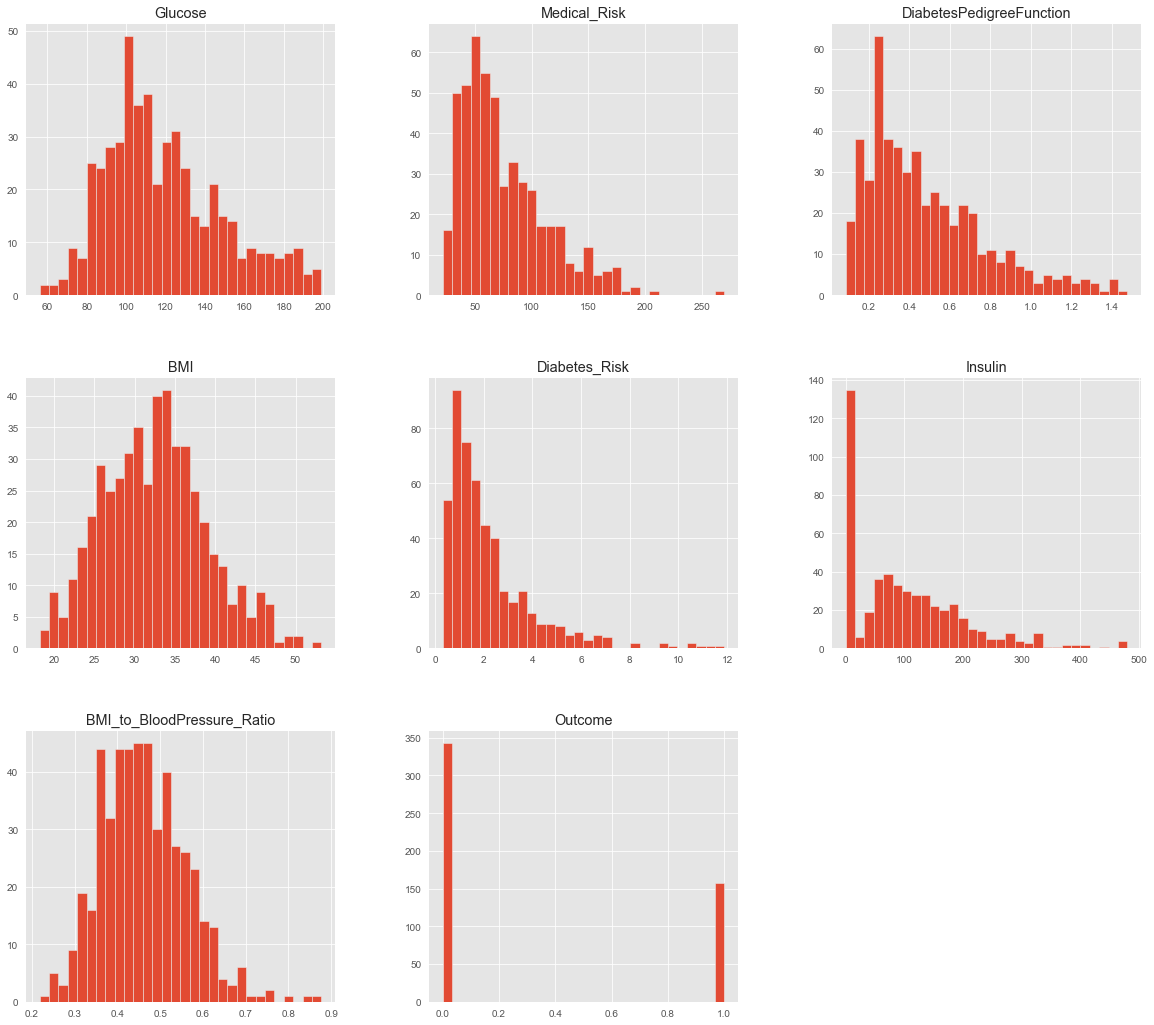

In [88]:
# Visualizing data distribution for each feature
df.hist(bins=30, figsize=(20, 18))
plt.show()

# Defining functions for later use

In [89]:
# Plot Confusion Matrix and include accuracy and F1 score
def plot_confusion_matrix(y_test, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    mat = confusion_matrix(y_pred, y_test)
    names = np.unique(y_pred)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

In [90]:
def show_cross_val_scores(model, X, Y):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(model, X, Y, cv=k_fold, n_jobs=1)
    for i in range(len(scores)):
        score = '%.3f'%(scores[i]*100)
        print("Fold {i} Accuracy: {score}%".format(i=i+1, score=score))
        
    print("Average Accuracy: {score}%".format(score=scores.mean()*100))

## Splitting Train-Test Data

In [165]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=2, shuffle=True)

# Check the number of records after over sampling
print(sorted(Counter(y_train).items()))

[(0, 244), (1, 106)]


## Under-sampling to balance the Data

In [166]:
# # Under sample the majority class
# nearmiss = NearMiss(version=3)
# x_train, y_train= nearmiss.fit_resample(x_train, y_train)
# # Check the number of records after over sampling
# print(sorted(Counter(y_train).items()))

## Over-sampling to balance the Data

In [167]:
# # Randomly over sample the minority class
# smote = SMOTE(random_state=42)
# x_train, y_train= smote.fit_resample(x_train, y_train)
# # Check the number of records after over sampling
# print(sorted(Counter(y_train).items()))

# Following paper methodologies
## Classifiers used: 
1. Naive Bayes (Presented in paper)
2. Decision tree (Presented in paper)
3. Random Forest
4. Logistic Regression
5. SVM

## Training methods:
1. Using a 70:30 train test split 
2. 10-fold cross validation

# Naive Bayes Classifier (Gaussian) results

ROC AUC score: 0.8306595365418895
Accuracy: 0.7666666666666667
F1 Score: 0.7698068491527432
Fold 1 Accuracy: 74.286%
Fold 2 Accuracy: 74.286%
Fold 3 Accuracy: 82.857%
Fold 4 Accuracy: 77.143%
Fold 5 Accuracy: 80.000%
Fold 6 Accuracy: 74.286%
Fold 7 Accuracy: 88.571%
Fold 8 Accuracy: 74.286%
Fold 9 Accuracy: 80.000%
Fold 10 Accuracy: 74.286%
Average Accuracy: 78.0%


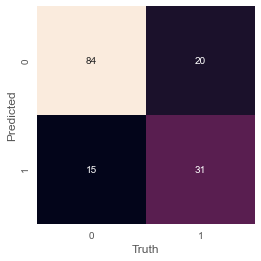

In [168]:
# Init the Gaussian Classifier (data)
gaussNB_model = GaussianNB()
# Train the model 
gaussNB_model.fit(x_train, y_train)
# Predict Output 
y_pred = gaussNB_model.predict(x_test)

y_pred_proba = gaussNB_model.predict_proba(x_test)[:, 1] # probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score:', roc_auc)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10 Fold Cross Validation
show_cross_val_scores(gaussNB_model, x_train, y_train)

# Decision tree Classifier results

ROC AUC score: 0.7620320855614973
Accuracy: 0.7533333333333333
F1 Score: 0.7659122551400356
Fold 1 Accuracy: 74.286%
Fold 2 Accuracy: 77.143%
Fold 3 Accuracy: 80.000%
Fold 4 Accuracy: 71.429%
Fold 5 Accuracy: 71.429%
Fold 6 Accuracy: 74.286%
Fold 7 Accuracy: 88.571%
Fold 8 Accuracy: 74.286%
Fold 9 Accuracy: 71.429%
Fold 10 Accuracy: 80.000%
Average Accuracy: 76.28571428571428%


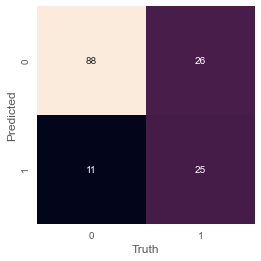

In [169]:
# Create Decision Tree classifer object
classifier_tree = DecisionTreeClassifier(criterion="entropy", splitter="best",max_depth=3)

# Train Decision Tree Classifer
classifier_tree = classifier_tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier_tree.predict(x_test)

y_pred_proba = classifier_tree.predict_proba(x_test)[:, 1] # probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score:', roc_auc)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10 Fold Cross Validation
show_cross_val_scores(classifier_tree, x_train, y_train)

## Visualizing the Decision Tree

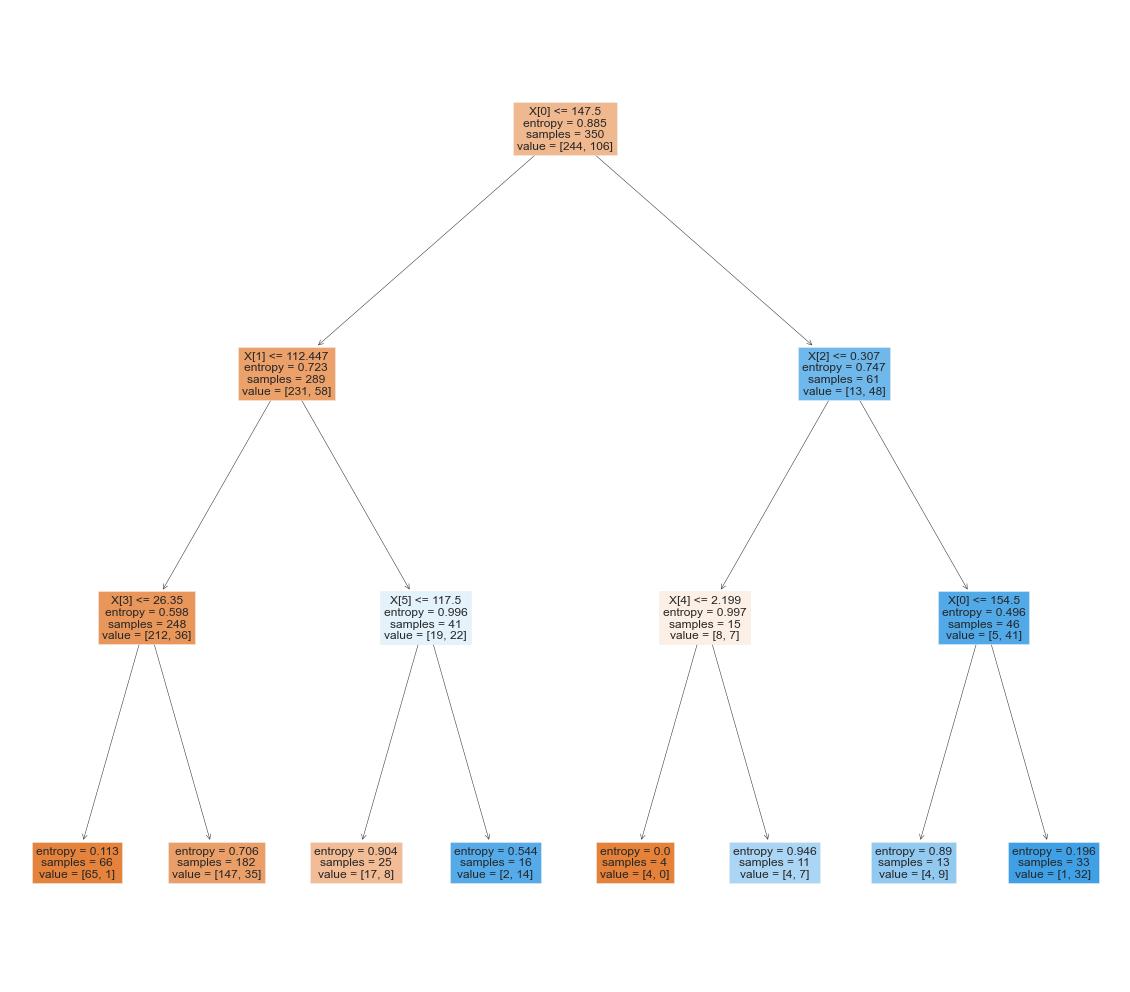

In [174]:
# Plot the decision tree using matplotlib
plt.figure(figsize=(20, 18))
tree.plot_tree(classifier_tree, filled=True, fontsize=12)
plt.show()

# Random Forest Classifier results

total error: 23.333333333333332
ROC AUC score: 0.809863339275104
Accuracy: 0.7666666666666667
F1 Score: 0.7765198714876547
Fold 1 Accuracy: 80.000%
Fold 2 Accuracy: 77.143%
Fold 3 Accuracy: 77.143%
Fold 4 Accuracy: 82.857%
Fold 5 Accuracy: 85.714%
Fold 6 Accuracy: 77.143%
Fold 7 Accuracy: 85.714%
Fold 8 Accuracy: 74.286%
Fold 9 Accuracy: 77.143%
Fold 10 Accuracy: 82.857%
Average Accuracy: 80.0%


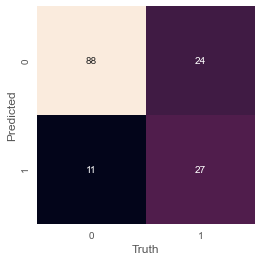

In [171]:
#create a random forest object
rf= RandomForestClassifier(n_estimators=1000)

#train the model and fit the model 
rf.fit(x_train, y_train)

#predict the model's response
RFpredictions = rf.predict(x_test)

# calculate the error for each cell, then the average absolte percentage error
errors = abs(RFpredictions - y_test)
all_error_percentage= mean(errors)*100

#print the results
print("total error:",all_error_percentage)
# print(classification_report(y_test,RFpredictions))

y_pred_proba = rf.predict_proba(x_test)[:, 1] # probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score:', roc_auc)


plot_confusion_matrix(y_test, RFpredictions, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10 Fold Cross Validation
show_cross_val_scores(rf, x_train, y_train)

# Logistic regression Classifier results

ROC AUC score: 0.845513963161022
Accuracy: 0.7733333333333333
F1 Score: 0.7802034559643255
Fold 1 Accuracy: 74.286%
Fold 2 Accuracy: 85.714%
Fold 3 Accuracy: 80.000%
Fold 4 Accuracy: 85.714%
Fold 5 Accuracy: 85.714%
Fold 6 Accuracy: 71.429%
Fold 7 Accuracy: 100.000%
Fold 8 Accuracy: 71.429%
Fold 9 Accuracy: 80.000%
Fold 10 Accuracy: 82.857%
Average Accuracy: 81.71428571428571%


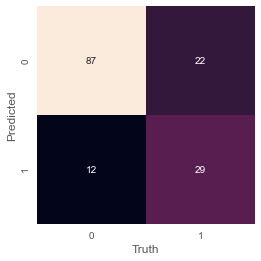

In [172]:
# Create Logistic Regression classifer object
logisticReg = LogisticRegression()

# Train logistic Classifer
logisticReg.fit(x_train, y_train)

#Predict the response for test dataset
logisticRegPredictions = logisticReg.predict(x_test)

#score 
# score=logisticReg.score(x_test, y_test)
# print(score)
y_pred_proba = logisticReg.predict_proba(x_test)[:, 1] # probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score:', roc_auc)
# Plot Confusion Matrix
plot_confusion_matrix(y_test, logisticRegPredictions, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10 Fold Cross Validation
show_cross_val_scores(logisticReg, x_train, y_train)

# SVM Classifier Results

Accuracy: 0.78
F1 Score: 0.7858625525946704
Fold 1 Accuracy: 74.286%
Fold 2 Accuracy: 85.714%
Fold 3 Accuracy: 80.000%
Fold 4 Accuracy: 82.857%
Fold 5 Accuracy: 85.714%
Fold 6 Accuracy: 74.286%
Fold 7 Accuracy: 100.000%
Fold 8 Accuracy: 71.429%
Fold 9 Accuracy: 80.000%
Fold 10 Accuracy: 80.000%
Average Accuracy: 81.42857142857143%


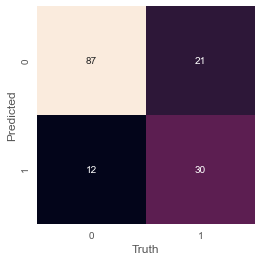

In [173]:
#initialize the svm model
svmModel = svm.SVC(kernel='linear')
# Train logistic Classifer
svmModel.fit(x_train, y_train)

#Predict the response for test dataset
svmPredications = svmModel.predict(x_test)

plot_confusion_matrix(y_test, svmPredications, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10 Fold Cross Validation
show_cross_val_scores(svmModel, x_train, y_train)

## Random State = 4

| Classifier | Training (Normal)     | Training (Oversampling) |
|------------|-----------------------|-------------------------|
| GNB        | Accuracy: 75%         | Accuracy: 75%           |
|            | F1 Score: 75%         | F1: 75%                 |
|            | Cross Validation: 80% | Cross Validation: 77%   |
| DT         | Accuracy: 74%         | Accuracy: 60%           |
|            | F1 Score: 74%         | F1 Score: 59%           |
|            | Cross Validation: 75% | Cross Validation: 74%   |
| RF         | Accuracy: 72%         | Accuracy: 70%           |
|            | F1 Score: 72%         | F1 Score: 70%           |
|            | Cross Validation: 80% | Cross Validation: 82%   |
| LR         | Accuracy: 74%         | Accuracy: 75%           |
|            | F1 Score: 75%         | F1 Score: 74%           |
|            | Cross Validation: 80% | Cross Validation: 75%   |
| SVM        | Accuracy: 72%         | Accuracy: 72%           |
|            | F1 Score: 73%         | F1 Score: 72%           |
|            | Cross Validation: 80% | Cross Validation: 75%   |

We can deduce that oversampling our data will not give us better results than the normal conditions and under-sampling gave us the worst results.

## Random State = 4 (Without preprocessing)

| Classifier | Accuracy | F1 Score | Cross Validation |
|------------|----------|----------|------------------|
| GNB        | 0.78     | 0.78     | 0.74             |
| DT         | 0.77     | 0.77     | 0.74             |
| RF         | 0.79     | 0.79     | 0.77             |
| LR         | 0.78     | 0.79     | 0.76             |
| SVM        | 0.81     | 0.82     | 0.77             |

## Random State = 2 (After preprocessing under normal conditions)

| Classifier | Accuracy | F1 Score | Cross Validation |
|------------|----------|----------|------------------|
| GNB        | 0.76     | 0.76     | 0.8              |
| DT         | 0.75     | 0.76     | 0.76             |
| RF         | 0.76     | 0.77     | 0.80             |
| LR         | 0.77     | 0.78     | 0.81             |
| SVM        | 0.78     | 0.78     | 0.81             |

We can deduce that the best two classifiers are Logistic Regression and Support Vector Machine and the pre-processing of our data improved our results.